In [1]:
import pandas as pd
import numpy as np

from collections import Counter


In [2]:
f = open("C:/Users/Shobeir/Desktop/Work/Fiverr/20160421/shisylva/VS10MORT.DUSMCPUB",buffering=100000)
output = open("final_csv.csv","w")

output.write('Education,Sex,Age_Value,Marital_Status,Manner_Of_Death,ICD10,Race\n')

for line in f:
    Education = line[60:62].strip()
    Sex = line[68].strip()
    Age_Value = line[70:73].strip()
    Place_Of_Death = line[82].strip()
    Marital_Status = line[83].strip()
    Manner_Of_Death = line[106].strip()
    ICD10 = line[145:149].strip()
    Race = line[444:446].strip()
    
    output.write(Education.strip()+","+Sex.strip()+","+Age_Value.strip()+","+
                 Marital_Status.strip()+","+Manner_Of_Death.strip()+","+
                 ICD10.strip()+","+Race.strip()+"\n")
    
f.close()
output.close()
print("Parse complete.")



Parse complete.


In [3]:
mydata = pd.read_csv("./final_csv.csv")
mydata.head()

,Education,Sex,Age_Value,Marital_Status,Manner_Of_Death,ICD10,Race
0,12.0,F,68,D,7.0,G049,3
1,6.0,F,12,S,7.0,C37,1
2,12.0,F,75,D,7.0,C719,1
3,12.0,M,61,W,7.0,F03,68
4,14.0,F,46,M,2.0,X72,1


# Q1 Sex Ratio?

In [4]:
print("M/F Ratio: ", mydata.Sex.value_counts()[1]/mydata.Sex.value_counts()[0])

M/F Ratio:  0.998272099827


# Q2 Age Distribution?

In [5]:
hist, bin_edges = np.histogram(mydata.Age_Value.values, bins=[0, 1, 10, 20,30,40,50,60,70,80,90,100])

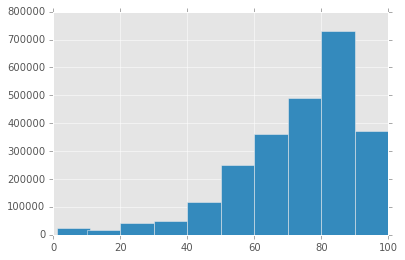

In [6]:
plt.bar(bin_edges[:-1], hist, width = 10)
plt.xlim(min(bin_edges), max(bin_edges))
plt.show()   

# Q3 Race?

In [32]:
print(mydata.Race.value_counts())

1     2117975
2      287434
3       15584
4       10974
7        9511
68       8877
5        6911
18       4723
28       3762
48       3194
78       2255
6         594
38        481
58        267
Name: Race, dtype: int64


# Q4 Education?

In [8]:
print((mydata.Education.value_counts())

12.0    317030
14.0     66389
16.0     62786
8.0      59863
17.0     39956
10.0     37576
11.0     34365
13.0     26781
9.0      23286
6.0      15953
0.0      12602
7.0      12021
15.0     11941
99.0     10845
5.0       5817
3.0       5242
4.0       4568
2.0       1571
1.0        741
Name: Education, dtype: int64

# Q5 Maritial Status?

In [9]:
print(mydata.Marital_Status.value_counts())

M    934687
W    880812
D    343034
S    299697
U     14312
Name: Marital_Status, dtype: int64

# Q6 manner of death?

In [10]:
print(mydata.Manner_Of_Death.value_counts())

7.0    1842436
1.0     116092
2.0      38710
3.0      17280
5.0      11506
4.0       5094
Name: Manner_Of_Death, dtype: int64

# Q7 Top 10 Cause of Death

In [11]:
cnt = Counter(mydata.ICD10.values)

In [12]:
ICD10_dict = {'I251':'Atherosclerotic heart disease',
             'C349':"Malignant neoplasm of bronchus or lung, unspecified",
             "I219":"Acute myocardial infarction, unspecified",
              'F03':"Unspecified dementia",
              "J449":"Chronic obstructive pulmonary disease, unspecified",
              "G309":"Alzheimer's disease, unspecified",
              "I64":"Stroke, not specified as hemorrhage or infarction",
              "I500":"Congestive heart failure",
              "I250":"Atherosclerotic cardiovascular disease, so described",
              "J189":"Pneumonia, unspecified"}

In [13]:
top_causes_tuples = cnt.most_common(10)

In [14]:
top_causes_list = [ICD10_dict[top_causes_tuples[i][0]] for i in range(len(top_causes_tuples))]

In [15]:
counter = 0
for i in top_causes_list:
    
    print(i,": ", top_causes_tuples[counter][1])
    counter +=1

Atherosclerotic heart disease :  171627
Malignant neoplasm of bronchus or lung, unspecified :  157595
Acute myocardial infarction, unspecified :  122093
Unspecified dementia :  98190
Chronic obstructive pulmonary disease, unspecified :  98022
Alzheimer's disease, unspecified :  80744
Stroke, not specified as hemorrhage or infarction :  68416
Atherosclerotic cardiovascular disease, so described :  57720
Congestive heart failure :  52288
Pneumonia, unspecified :  43864


# Q8 Correlation between education and death age?

In [33]:
print(mydata.Education.corr(mydata.Age_Value))

0.0332372719073


There is almost no correlation between the Education and Age.

# Q9 Correlation between race and death age?

In [34]:
print(mydata.Race.corr(mydata.Age_Value))

-0.0409747010757


There is almost no correlation between the Education and Age. The negative sign is an anti-correlation, meaning that the more you move away from being white, the younger you die! 

# Q10 Correlation between marital status and death age?

In [20]:
mydata.Marital_Status.unique()

array(['D', 'S', 'W', 'M', 'U'], dtype=object)

In [21]:
maritial_status_dict = {'D':-2, 'S':-1, 'W':1, 'M':2, 'U':0}

In [28]:
int_maritial_status_list = [maritial_status_dict[i] for i in mydata.Marital_Status.values.tolist()]
int_maritial_status_array = np.array(int_maritial_status_list)

In [35]:
print(np.corrcoef(mydata.Race.values,int_maritial_status_array)[0,1])

0.00677205061359


There is almost no correlation between death age and maritial status.